# KRR

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.kernel_ridge import KernelRidge
from math import sqrt

In [2]:
df=pd.read_excel('all_data.xlsx')
df

Cation  BE (eV)  Stage  No. of cations  Molecular weight (g/mol)  \
0       N14_ml   -0.163      1               4                 633.05576   
1       N14_ml   -1.019      1               8                1266.11152   
2    CH2OMe_ml   -1.575      1              12                1754.51496   
3    CH2OMe_ml   -2.357      1              16                2339.35328   
4         S221   -0.964      1              12                1262.69064   
..         ...      ...    ...             ...                       ...   
164      em_pz   -1.311      4               4                 444.66728   
165    dmpi_im   -2.640      4               1                 139.22058   
166    dmpi_im   -3.900      4               4                 556.88232   
167    bmim_im   -1.954      4               2                 278.44116   
168    bmim_im   -2.110      4               3                 417.66174   

     Molar volume (cm3/mol)   HOMO (eV)   LUMO (eV)  Dipole moment (D)  \
0                   512.972       -8.24      -0.580             2.6705   
1                  1025.940       -8.24      -0.580             2.6705   
2                  1438.030       -8.28      -0.590             3.5058   
3                  1917.380       -8.28      -0.590             3.5058   
4                  1257.350       -9.68      -1.000             1.7831   
..                      ...         ...         ...                ...   
164                 346.520       -8.42      -1.852             1.8029   
165                 122.797       -9.99       1.670             3.7600   
166                 491.188       -9.99       1.670             3.7600   
167                 220.956      -10.34       1.570             6.6260   
168                 331.434      -10.34       1.570             6.6260   

     Energy (eV)  No. of hetero atoms  Avg. charge on hetero Atom |e|  \
0       -669.391                    8                          -1.854   
1      -1338.782                   16                          -3.708   
2      -1679.414                   36                          -6.212   
3      -2239.219                   48                          -8.282   
4      -1142.505                   12                          10.212   
..           ...                  ...                             ...   
164     -435.580                    8                          -0.582   
165     -142.510                    2                          -0.350   
166     -570.052                    8                          -1.400   
167     -284.696                    4                          -0.690   
168     -427.044                    6                          -1.035   

     No. of gallery  Avg. ionic radius(Å)   Avg. Pauling electronegativity  \
0                 4               0.404839                        2.368710   
1                 4               0.404839                        2.368710   
2                 4               0.413462                        2.421923   
3                 4               0.413462                        2.421923   
4                 4               0.407895                        2.312105   
..              ...                    ...                             ...   
164               1               0.434211                        2.398947   
165               1               0.426000                        2.379200   
166               1               0.426000                        2.379200   
167               1               0.426000                        2.379200   
168               1               0.426000                        2.379200   

     Avg. polarizability(Å3)  Avg. 1st ionization potential (kJ/mol)  \
0                   1.035258                             1249.354839   
1                   1.035258                             1249.354839   
2                   1.018692                             1254.769231   
3                   1.018692                             1254.769231   
4                   1.105263    

In [ ]:
df.columns

Index(['Cation', 'BE (eV)', 'Stage', 'No. of cations',
       'Molecular weight (g/mol)', 'Molar volume (cm3/mol)', ' HOMO (eV)',
       ' LUMO (eV)', 'Dipole moment (D)', 'Energy (eV)', 'No. of hetero atoms',
       'Avg. charge on hetero Atom |e|', 'No. of gallery',
       'Avg. ionic radius(Å) ', 'Avg. Pauling electronegativity',
       'Avg. polarizability(Å3)', 'Avg. 1st ionization potential (kJ/mol)',
       'Avg. number of valence electrons'],
      dtype='object')

In [ ]:
df=pd.read_excel('all_data.xlsx')
df1 = df.copy()
df1 = df.drop(['Cation','Molecular weight (g/mol)','Energy (eV)','Molar volume (cm3/mol)','Avg. polarizability(Å3)'], axis=1)
x = df1.drop(["BE (eV)"], axis=1)
y = df1["BE (eV)"]

In [ ]:
df1.shape

(169, 13)

In [ ]:
krr = KernelRidge()

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15)

In [ ]:
y_test

9     -1.109
26     0.123
165   -2.640
71     0.800
154   -2.360
47     0.002
109   -2.005
137   -1.500
72    -0.269
36    -0.163
65    -0.313
30    -0.490
149   -1.047
130    0.064
129   -1.255
100   -2.102
116   -0.348
147   -2.329
142   -1.515
78    -1.125
113   -1.486
122   -0.556
25    -0.835
12     0.156
148   -0.506
132   -2.450
Name: BE (eV), dtype: float64

In [ ]:
y_train.shape

(143,)

In [ ]:
from sklearn.metrics import mean_absolute_error
krr = KernelRidge()
krr.fit(x_train, y_train)
y_krr = krr.predict(x_test)
RMSE= sqrt(mean_squared_error(y_test, y_krr))
MAE=mean_absolute_error(y_test,y_krr)
print(MAE)
print(RMSE)

0.38828473163494737
0.47500999284072876


In [ ]:
alpha_1 = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e+1, 1e+2, 1e+3, 1e+4, 1e+5]
#alpha_1 = [1e-1, 1e0, 1e+1]
coef0_1  = [0,1,2,3,4,5,6,8,10]
degree_1 = [0,1,2,3,4,5]
gamma_1 = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e+1, 1e+2, 1e+3, 1e+4, 1e+5, 1e+5]
#gamma_1 = [1e-2, 1e-1, 1e0, 1e+1, 1e+2]
kernel_1 = ['linear', 'rbf', 'laplacian', 'polynomial']
#kernel_1 = ['rbf']

In [ ]:
random_grid_krr = {'alpha':alpha_1,
                   'degree': degree_1,
                   'coef0': coef0_1,
                   'gamma': gamma_1,
                   'kernel': kernel_1}

In [ ]:
RANDOM_STATE = []
RMSE = []
for i in range(0, 501, 1):
    RANDOM_STATE.append(i)
    randomcv_krr = RandomizedSearchCV(estimator=krr, param_distributions=random_grid_krr, random_state=i)
    randomcv_krr.fit(x_train, y_train)
    krr_best= randomcv_krr.best_estimator_
    krr_best_pred = krr_best.predict(x_test)
    krr_best_RMSE = sqrt(mean_squared_error(y_test, krr_best_pred))
    RMSE.append(krr_best_RMSE)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.8/dist

In [ ]:
min(RMSE)

0.26485816570457554

In [ ]:
RMSE_df=pd.DataFrame()
RMSE_df['Random state']=RANDOM_STATE
RMSE_df['RMSE']=RMSE

In [ ]:
minimum = min(RMSE)
minimum
RS = RMSE_df[RMSE_df['RMSE']==minimum].iloc[0]["Random state"]
RS

143.0

In [ ]:
randomcv_krr = RandomizedSearchCV(estimator=krr, param_distributions=random_grid_krr, random_state=143)
randomcv_krr.fit(x_train, y_train)
krr_best= randomcv_krr.best_estimator_
print(krr_best)
krr_best_pred = krr_best.predict(x_test)
krr_best_RMSE = sqrt(mean_squared_error(y_test, krr_best_pred))
print(krr_best_RMSE)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


KernelRidge(alpha=1e-05, coef0=2, degree=0, gamma=0.01, kernel='laplacian')
0.26485816570457554


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
krr = KernelRidge(alpha=1e-05, coef0=2, degree=0, gamma=0.01, kernel='laplacian')
krr.fit(x_train, y_train)
krr_test_pred = krr.predict(x_test)
krr_train_pred = krr.predict(x_train)
print("TEST_RMSE:",sqrt(mean_squared_error(y_test, krr_test_pred)))
print("TEST_MAE:",mean_absolute_error(y_test, krr_test_pred))
print("TEST_R2:",r2_score(y_test, krr_test_pred))
print("Train_RMSE:",sqrt(mean_squared_error(y_train, krr_train_pred)))
print("Train_MAE:",mean_absolute_error(y_train, krr_train_pred))
print("Train_R2:",r2_score(y_train, krr_train_pred))

TEST_RMSE: 0.26485816570457554
TEST_MAE: 0.19958681513096418
TEST_R2: 0.9153810585357418
Train_RMSE: 0.0006558201155676503
Train_MAE: 0.0004267238987567243
Train_R2: 0.9999996112595545


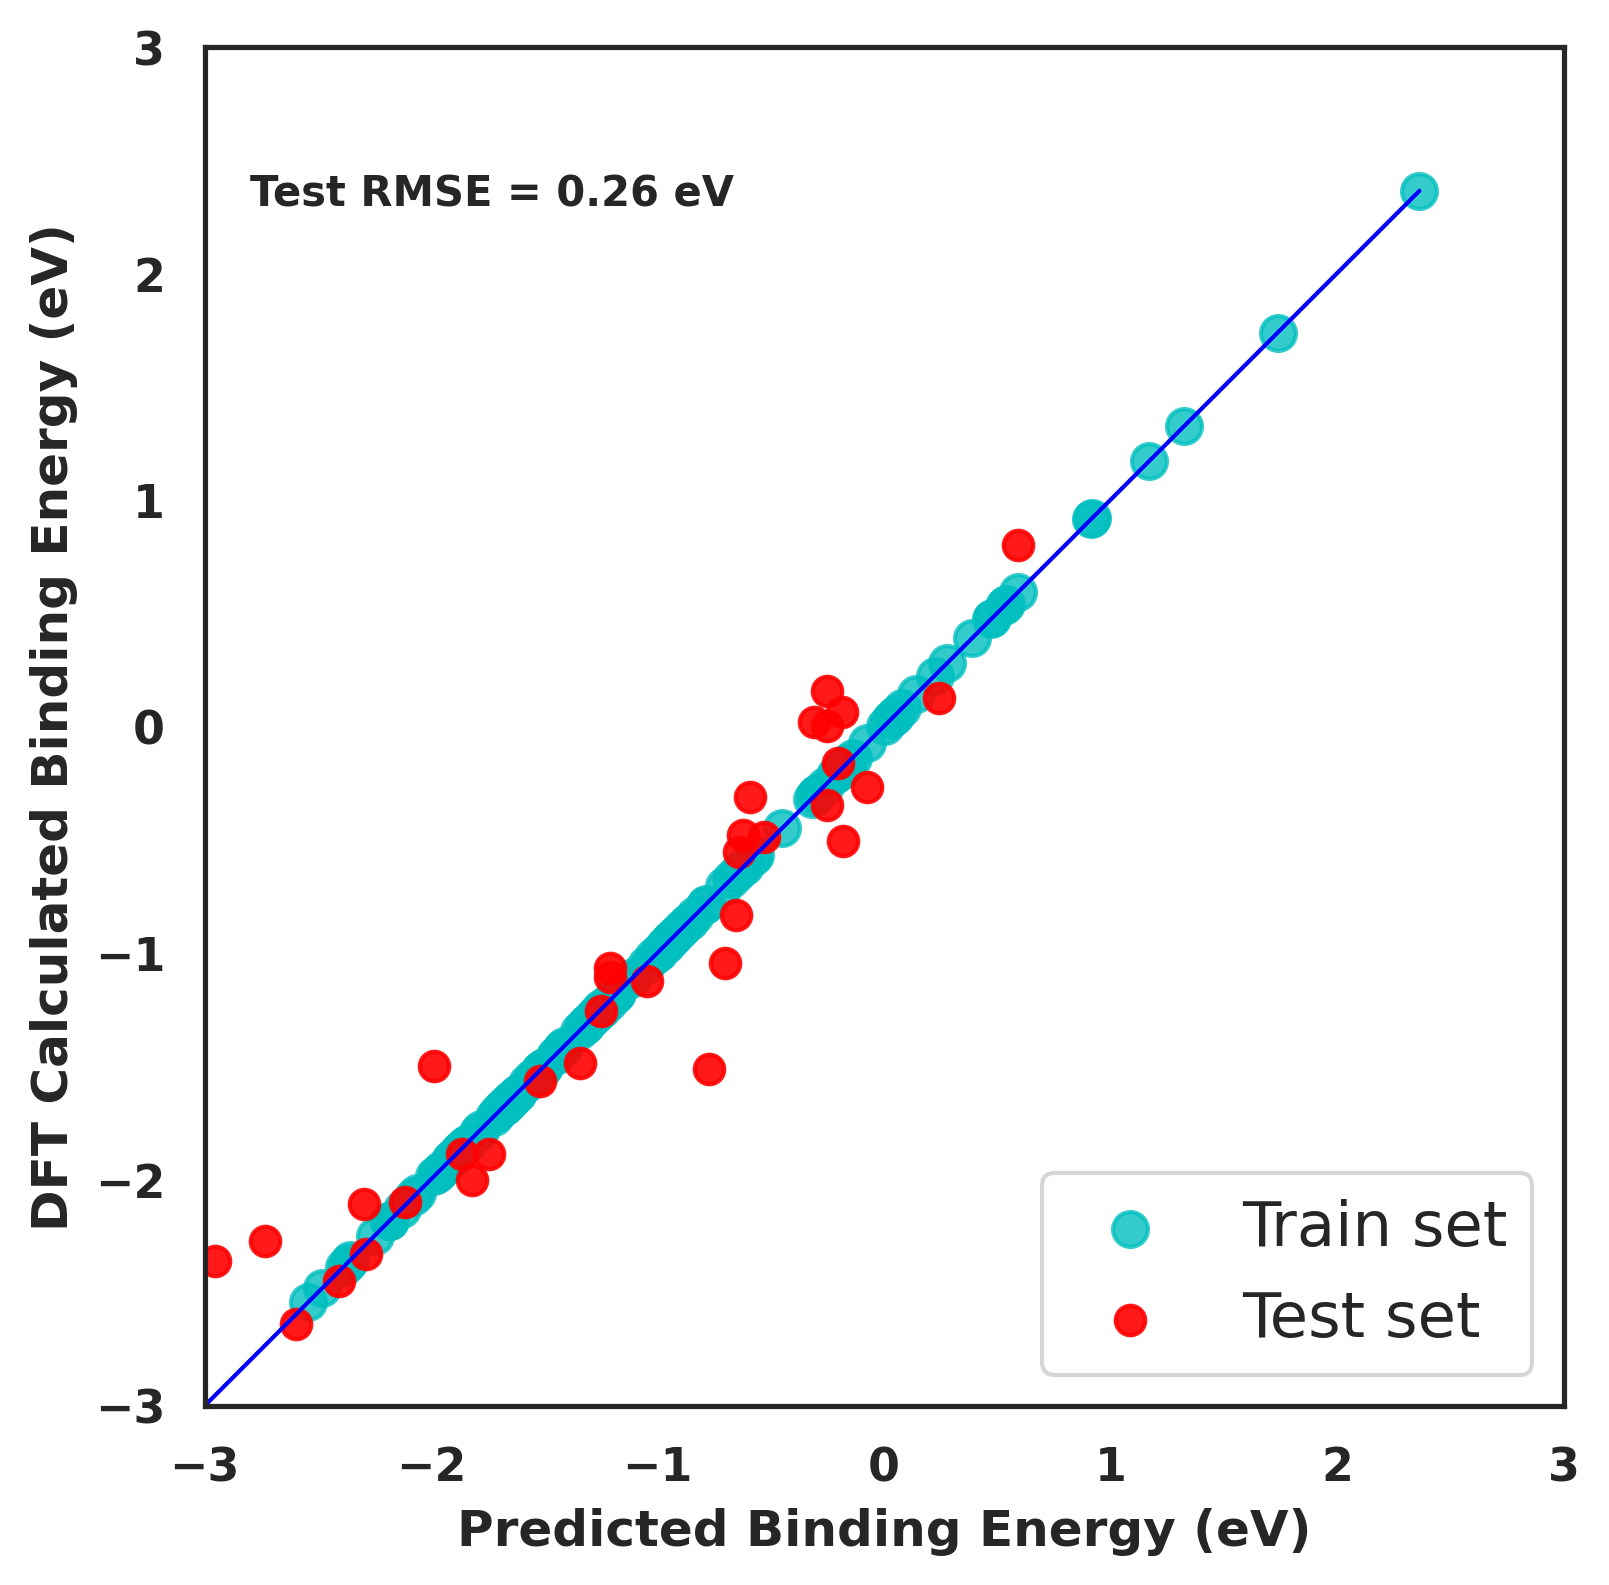

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(6, 6), dpi=300)
plt.rcParams['font.size'] = 10
sns.regplot(x=krr_train_pred, y=y_train,color='c',scatter_kws={'s':70},line_kws={"lw":1, 'color':'blue'},label = 'Train set')
plt.scatter(krr_test_pred, y_test, color='r',s=50, label = 'Test set', alpha = 0.9)
plt.xlabel('Predicted Binding Energy (eV)', fontsize = 12,weight='bold')
plt.ylabel('DFT Calculated Binding Energy (eV)', fontsize = 12,weight='bold')
plt.axis('square')
#plt.text(-2.8, 2.0, "Train RMSE = 0.0007 eV",weight='bold')
plt.text(-2.8, 2.3, "Test RMSE = 0.26 eV", weight='bold')
#plt.text(-0.15, 1.2, "Test MAE = 0.031 $E_h$", weight='bold')
#plt.text(-0.2, 1, "Train $R^2$ = 0.999")
#plt.text(-2.8, 2.6, "Test $R^2$ = 0.95", weight='bold')
#plt.text(0.45, 1.1, "Train set: y = 1.000x - 1.763E-06 ")
#plt.text(0.7, 2.7, " y = 0.951x - 0.05 ", weight='bold')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

sns.set_theme(style="white", palette=None)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.legend(fontsize=15, loc='lower right')
#plt.grid(False)
plt.show()

## LOOCV_KRR

In [33]:
krr = KernelRidge(alpha=1e-05, coef0=2, degree=0, gamma=0.01, kernel='laplacian')

In [34]:
import numpy as np
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

In [35]:
scores = cross_val_score(krr,x,y,cv=loo, scoring='neg_mean_squared_error')
print(scores)
rmse = np.sqrt(-scores)
print (rmse)
#print("RMSE values: ", np.round(rmse, 3))
print("RMSE average: ", np.mean(rmse))

[-1.91691590e-02 -1.39888159e-01 -3.55289613e-01 -6.82577253e-01
 -1.50833509e-01 -2.37512376e-01 -1.11432127e-02 -6.07152164e-02
 -7.94305080e-03 -1.04133420e-02 -3.22234119e-01 -7.93132193e-03
 -7.50085947e-02 -7.64158866e-01 -4.64177874e-02 -2.11304913e-02
 -4.73363745e-02 -2.60669818e-02 -3.01989261e-03 -4.05131317e-02
 -1.36144853e-01 -1.07963450e-01 -2.29948249e-03 -3.24227871e-02
 -7.34612955e-02 -9.95156365e-02 -3.17962346e-02 -3.65077750e-02
 -5.59733725e-03 -2.14777065e-03 -1.67136542e-02 -1.39293074e-02
 -2.48252896e-03 -7.62563755e-04 -1.78033621e-03 -1.23818330e-04
 -5.40666151e-06 -3.00631938e-03 -7.19300587e-04 -2.35838798e-04
 -3.25809354e-02 -3.77688844e-03 -8.70781547e-02 -1.66457667e-01
 -2.34276460e-03 -3.45885155e-02 -1.09637162e-02 -4.80370622e-02
 -1.73565145e-03 -2.63184829e-02 -1.62006916e+00 -6.16550932e-03
 -8.71334417e-02 -2.55265377e-01 -2.10145456e+00 -3.61128658e-02
 -1.73364656e-02 -1.79028731e-03 -7.35885314e-04 -4.58088651e-02
 -5.56189818e-02 -4.41044

# XGBOOST

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from math import sqrt

In [3]:
df=pd.read_excel('all_data.xlsx')
df1 = df.copy()
df1 = df.drop(['Cation','Molar volume (cm3/mol)','Avg. polarizability(Å3)','Molecular weight (g/mol)','Energy (eV)'], axis=1)
x = df1.drop(["BE (eV)"], axis=1)
y = df1["BE (eV)"]

In [ ]:
df1.columns

Index(['BE (eV)', 'Stage', 'No. of cations', ' HOMO (eV)', ' LUMO (eV)',
       'Dipole moment (D)', 'No. of hetero atoms',
       'Avg. charge on hetero Atom |e|', 'No. of gallery',
       'Avg. ionic radius(Å) ', 'Avg. Pauling electronegativity',
       'Avg. 1st ionization potential (kJ/mol)',
       'Avg. number of valence electrons'],
      dtype='object')

In [ ]:
df1.shape

(169, 13)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15)

In [ ]:
y_test.shape

(34,)

# LGBM

In [5]:
from lightgbm import LGBMRegressor

In [6]:
lgb=LGBMRegressor(random_state=42)

In [7]:
from sklearn.metrics import mean_absolute_error
lgb.fit(x_train, y_train)
y_lgb = lgb.predict(x_test)
RMSE= sqrt(mean_squared_error(y_test, y_lgb))
MAE=mean_absolute_error(y_test,y_lgb)
print(MAE)
print(RMSE)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 135, number of used features: 12
[LightGBM] [Info] Start training from score -1.111841
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

0.29598171421684577   MAE ||
0.35732843647781415   RMSE

In [ ]:
lgb.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [8]:
#booster_1 = ['gbtree', 'bglinear']
n_estimators_1 = [10,50,100, 200,300,500,600,700,800,900]
max_depth_1 = [0.5,1,2,3,5,10,15,20,25,30,35,40]
learning_rate_1=[0.01,0.02,0.03,0.04,0.05,0.06,0.08,0.1,0.15,0.2,0.25]
min_child_weight_1=[0.01,0.05,0.1,1,2,3,4,5]
num_leaves_1 = [10,20,30,40,50,60,70]
verbose_1 = [ 5, 10,15,20,25, 30 ,35, 40, 45]

#n_estimators_1 = [100, 200, 300, 400,500,600,700,800, 900,1000, 1100,1200,1300,1400,1500]
#max_depth_1= [3, 6, 9]
#learning_rate_1= [0.001, 0.005, 0.01, 0.1, 0.2, 0.3, 0.5]
#min_child_weight_1= [1, 10, 100]

random_grid_lgb = {
    'n_estimators': n_estimators_1,
    'max_depth': max_depth_1,
    'learning_rate': learning_rate_1,
    'min_child_weight': min_child_weight_1,
    'num_leaves':num_leaves_1,
    'verbose':verbose_1
    }

In [9]:
RANDOM_STATE = []
RMSE = []
for i in range(0, 101, 1):
    RANDOM_STATE.append(i)
    randomcv_lgb = RandomizedSearchCV(estimator=lgb, param_distributions=random_grid_lgb, random_state=i)
    randomcv_lgb.fit(x_train, y_train)
    lgb_best= randomcv_lgb.best_estimator_
    lgb_best_pred = lgb_best.predict(x_test)
    lgb_best_RMSE = sqrt(mean_squared_error(y_test, lgb_best_pred))
    RMSE.append(lgb_best_RMSE)

Output hidden; open in https://colab.research.google.com to view.

In [10]:
min(RMSE)

0.34874902832194715

In [11]:
RMSE_df=pd.DataFrame()
RMSE_df['Random state']=RANDOM_STATE
RMSE_df['RMSE']=RMSE

In [12]:
minimum = min(RMSE)
print(minimum)
RS = RMSE_df[RMSE_df['RMSE']==minimum].iloc[0]["Random state"]
print(RS)

0.34874902832194715
29.0


In [15]:
randomcv_lgb = RandomizedSearchCV(estimator=lgb, param_distributions=random_grid_lgb, random_state=29)
randomcv_lgb.fit(x_train, y_train)
lgb_best= randomcv_lgb.best_estimator_
print(lgb_best)
lgb_best_pred = lgb_best.predict(x_test)
lgb_best_RMSE = sqrt(mean_squared_error(y_test, lgb_best_pred))
print(lgb_best_RMSE)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 4 and depth = 3
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 4 and depth = 3
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 4 and depth = 2
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 4 and depth = 3
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 5 and depth = 4
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 4 and depth = 3
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with l

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 1049, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 842, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py", line 245, in train
    booster

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 3 and depth = 2
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 3 and depth = 2
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 3 and depth = 2
[LightGBM] [Debug] Trained a tree with leaves = 4 and depth = 2
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 3 and depth = 2
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 3 and depth = 2
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 3 and depth = 2
[LightGBM] [Debug] Trained a tree with leaves = 4 and depth = 2
[LightGBM] [Warning] No further splits

In [17]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [18]:
lgb = LGBMRegressor(learning_rate=0.06, max_depth=2, min_child_weight=1,
              n_estimators=500, num_leaves=50, random_state=42, verbose=5)
lgb.fit(x_train, y_train)
lgb_test_pred = lgb.predict(x_test)
lgb_train_pred = lgb.predict(x_train)
print("TEST_RMSE:",sqrt(mean_squared_error(y_test, lgb_test_pred)))
print("TEST_MAE",mean_absolute_error(y_test, lgb_test_pred))
print("TEST_R2",r2_score(y_test, lgb_test_pred))
print("Train_RMSE",sqrt(mean_squared_error(y_train, lgb_train_pred)))
print("Train_MAE",mean_absolute_error(y_train, lgb_train_pred))
print("Train_R2",r2_score(y_train, lgb_train_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.000000
[LightGBM] [Debug] init for col-wise cost 0.000007 seconds, init for row-wise cost 0.002319 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002346 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 135, number of used features: 12
[LightGBM] [Info] Start training from score -1.111841
[LightGBM] [Debug] Trained a tree with leaves = 4 and depth = 2
[LightGBM] [Debug] Trained a tree with leaves = 4 and depth = 2
[LightGBM] [Debug] Trained a tree with leaves = 4 and depth = 2
[LightGBM] [Debug] Trained a tree with leaves = 4 and depth = 2
[LightGBM] [Debug] Trained a tree with leaves = 4 and depth = 2
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

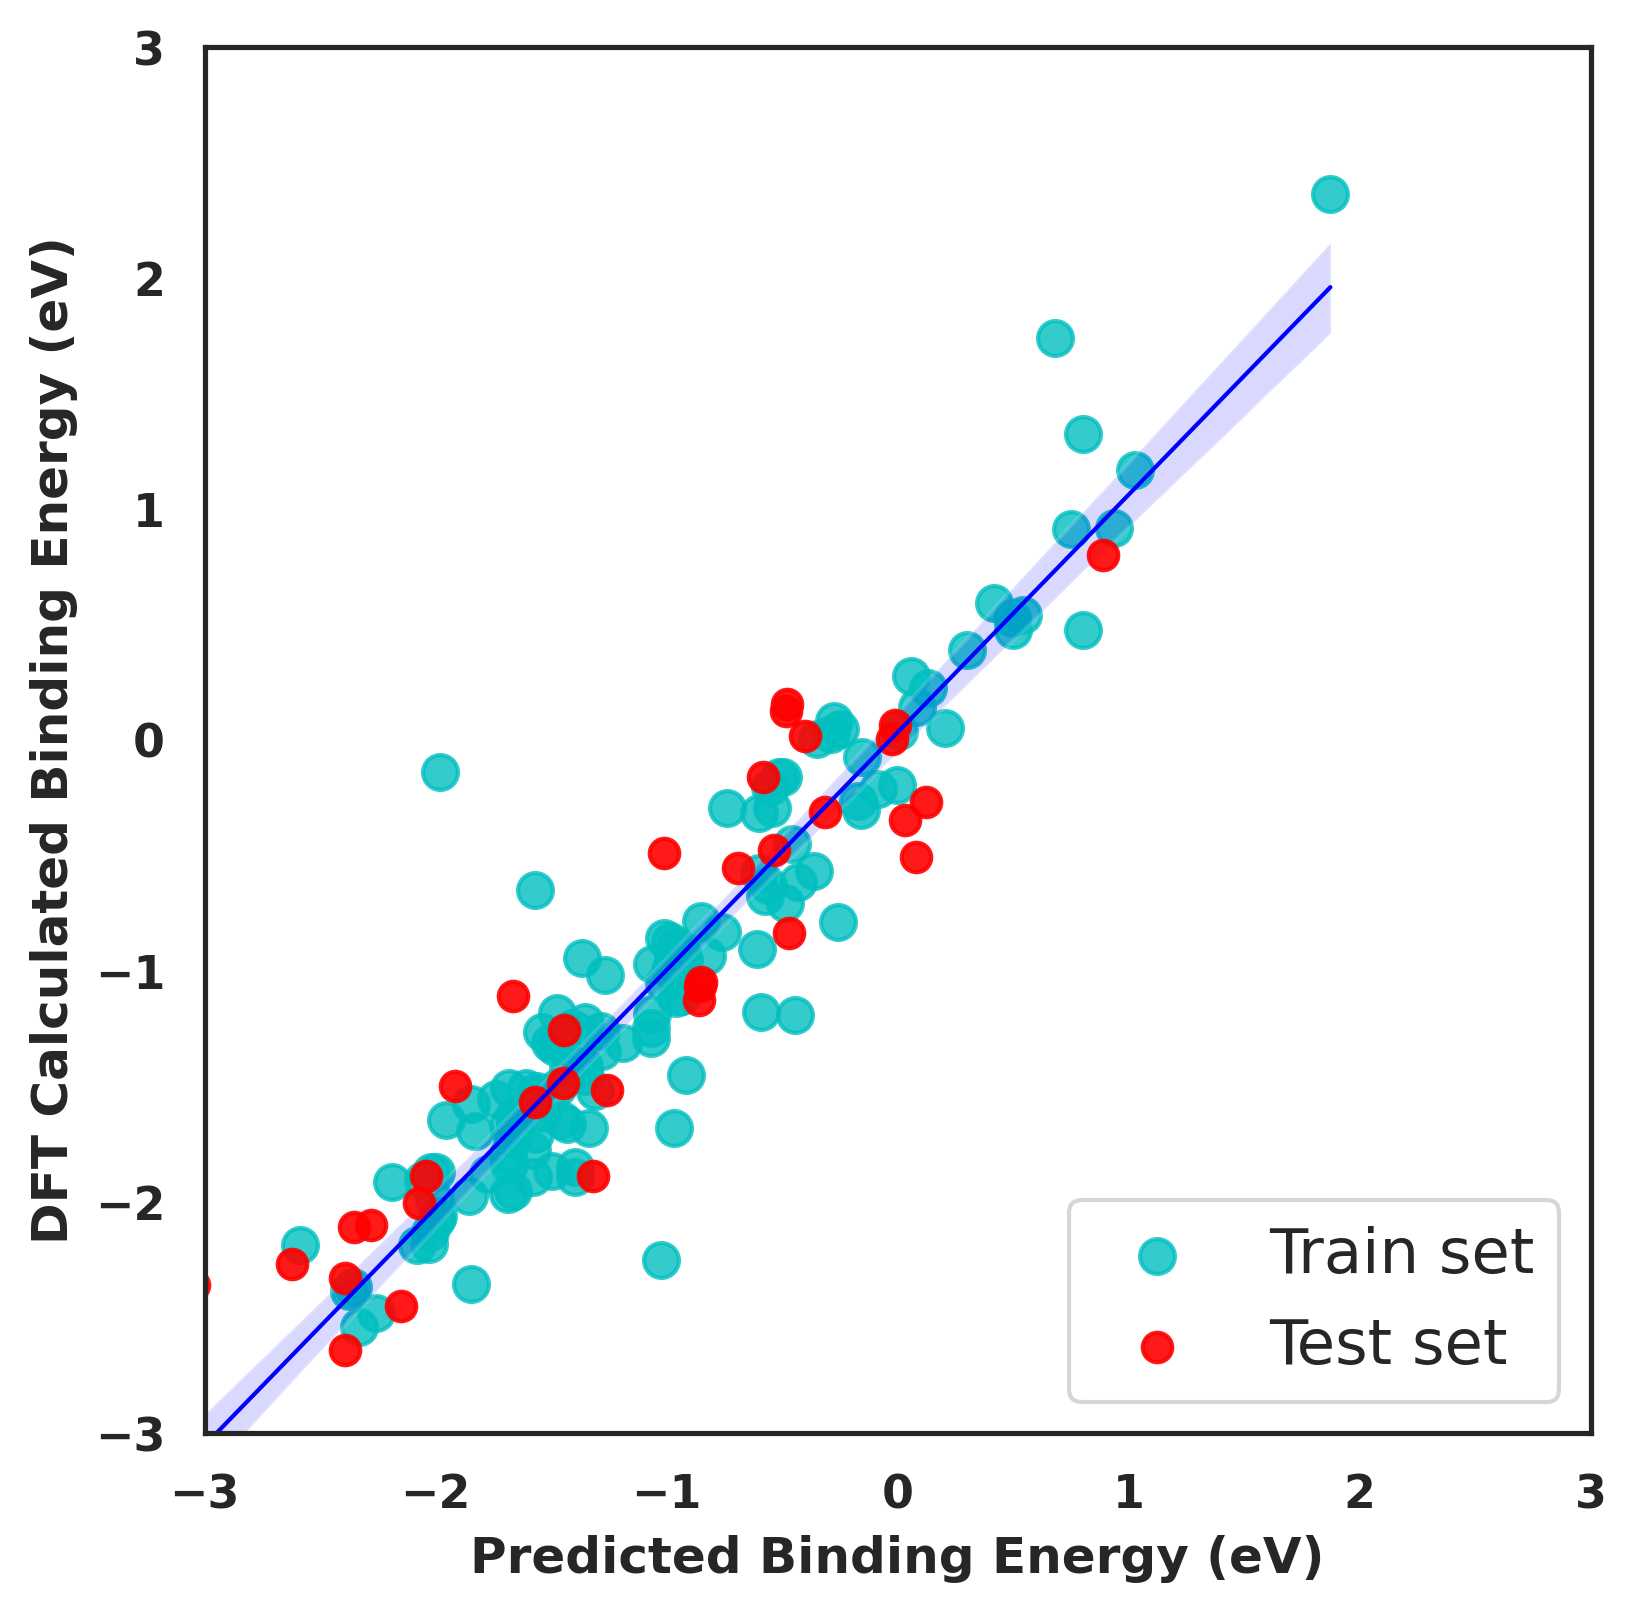

In [20]:
from matplotlib.pyplot import figure

figure(figsize=(6, 6), dpi=300)
plt.rcParams['font.size'] = 10
sns.regplot(x=lgb_train_pred, y=y_train,color='c',scatter_kws={'s':70},line_kws={"lw":1, 'color':'blue'},label = 'Train set')
plt.scatter(lgb_test_pred, y_test, color='r',s=50, label = 'Test set', alpha = 0.9)
plt.xlabel('Predicted Binding Energy (eV)', fontsize = 12,weight='bold')
plt.ylabel('DFT Calculated Binding Energy (eV)', fontsize = 12,weight='bold')
plt.axis('square')
#plt.text(-2.8, 2.0, "Train RMSE = 0.02 eV",weight='bold')
#plt.text(-2.8, 2.3, "Test RMSE = 0.15 eV", weight='bold')
#plt.text(-0.15, 1.2, "Test MAE = 0.031 $E_h$", weight='bold')
#plt.text(-0.2, 1, "Train $R^2$ = 0.999")
#plt.text(-2.8, 2.6, "Test $R^2$ = 0.97", weight='bold')
#plt.text(0.45, 1.1, "Train set: y = 1.000x - 1.763E-06 ")
#plt.text(0.7, 2.7, " y = 0.957x - 0.06 ", weight='bold')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

sns.set_theme(style="white", palette=None)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.legend(fontsize=15, loc='lower right')
#plt.grid(False)
plt.show()

# XGBR

In [61]:
xgb = XGBRegressor(random_state=42,objective='reg:squarederror')

In [ ]:
from sklearn.metrics import mean_absolute_error
xgb.fit(x_train, y_train)
y_xgb = xgb.predict(x_test)
RMSE= sqrt(mean_squared_error(y_test, y_xgb))
MAE=mean_absolute_error(y_test,y_xgb)
print(MAE)
print(RMSE)

0.20118678561378928
0.2590063652351857


[link text](https://)0.286 for 4 dropping (0.15),
0.27 (5 dropping, 0.15),0.25(4 dropping,0.2), 0.27(5 dropping,0.2)

```
# This is formatted as code
```



In [ ]:
xgb.get_params()

In [ ]:
#booster_1 = ['gbtree', 'bglinear']
base_score_1 = [-0.25,0,0.10,0.25,0.5,0.75,1]
n_estimators_1 = [10,50,100, 200,300,500, 900, 1100, 1500, 1600, 1700, 1800, 1900, 2000]
max_depth_1 = [0.5,1,2,3,5,10,15,20,25,30,35,40]
learning_rate_1=[0.01,0.02,0.03,0.04,0.05,0.06,0.08,0.1,0.15,0.20,0.25,0.30]
min_child_weight_1=[1,2,3,4,5,6,7,8,9,10,11,12]
cv_1 = [1, 2, 3, 4, 5, 10]
verbose_1 = [ 5, 10,15,20,25, 30 ,35, 40, 45]

#n_estimators_1 = [100, 200, 300, 400,500,600,700,800, 900,1000, 1100,1200,1300,1400,1500]
#max_depth_1= [3, 6, 9]
#learning_rate_1= [0.001, 0.005, 0.01, 0.1, 0.2, 0.3, 0.5]
#min_child_weight_1= [1, 10, 100]

random_grid_xgb = {
    'n_estimators': n_estimators_1,
    'max_depth': max_depth_1,
    'learning_rate': learning_rate_1,
    'min_child_weight': min_child_weight_1,
    'base_score':base_score_1,
    'cv':cv_1,
    'verbose':verbose_1
    }

In [ ]:
RANDOM_STATE = []
RMSE = []
for i in range(0, 501, 1):
    RANDOM_STATE.append(i)
    randomcv_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=random_grid_xgb, random_state=i)
    randomcv_xgb.fit(x_train, y_train)
    xgb_best= randomcv_xgb.best_estimator_
    xgb_best_pred = xgb_best.predict(x_test)
    xgb_best_RMSE = sqrt(mean_squared_error(y_test, xgb_best_pred))
    RMSE.append(xgb_best_RMSE)

Streaming output truncated to the last 5000 lines.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [ 0.80718976  0.66460434  0.67902029         nan  0.68537377  0.66712495
  0.67566356 -0.52621453  0.8070992   0.66294662]
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 

In [ ]:
min(RMSE)

0.15163363791908768

In [ ]:
RMSE_df=pd.DataFrame()
RMSE_df['Random state']=RANDOM_STATE
RMSE_df['RMSE']=RMSE

In [ ]:
minimum = min(RMSE)
print(minimum)
RS = RMSE_df[RMSE_df['RMSE']==minimum].iloc[0]["Random state"]
print(RS)

0.15163363791908768
167.0


In [ ]:
randomcv_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=random_grid_xgb, random_state=167)
randomcv_xgb.fit(x_train, y_train)
xgb_best= randomcv_xgb.best_estimator_
print(xgb_best)
xgb_best_pred = xgb_best.predict(x_test)
xgb_best_RMSE = sqrt(mean_squared_error(y_test, xgb_best_pred))
print(xgb_best_RMSE)

XGBRegressor(base_score=0.1, cv=2, learning_rate=0.15, max_depth=2,
             n_estimators=1800, objective='reg:squarederror', random_state=42,
             verbose=45)
0.15163363791908768


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
xgbr = XGBRegressor(base_score=0.1, cv=2, learning_rate=0.15, max_depth=2,
             n_estimators=1800, objective='reg:squarederror', random_state=42,
             verbose=45)
xgbr.fit(x_train, y_train)
xgbr_test_pred = xgbr.predict(x_test)
xgbr_train_pred = xgbr.predict(x_train)
print("TEST_RMSE:",sqrt(mean_squared_error(y_test, xgbr_test_pred)))
print("TEST_MAE",mean_absolute_error(y_test, xgbr_test_pred))
print("TEST_R2",r2_score(y_test, xgbr_test_pred))
print("Train_RMSE",sqrt(mean_squared_error(y_train, xgbr_train_pred)))
print("Train_MAE",mean_absolute_error(y_train, xgbr_train_pred))
print("Train_R2",r2_score(y_train, xgbr_train_pred))

TEST_RMSE: 0.15163363791908768
TEST_MAE 0.11271684963475254
TEST_R2 0.9722647577687211
Train_RMSE 0.021102301106804264
Train_MAE 0.01420356349039962
Train_R2 0.9995975148210714


In [ ]:
a = []
b = []
for i,j in zip(xgbr_test_pred,y_test):
  a.append(i)
  b.append(j)
bal = pd.DataFrame()
bal['a']=a
bal['b']=b
bal.to_csv('test.csv')

In [ ]:
bal

In [ ]:
train_xgbr_pred1 = pd.DataFrame()
train_xgbr_pred1['train_pred'] = xgbr_train_pred
train_xgbr_pred1['Actual train'] = y_train
test_xgbr_pred1 = pd.DataFrame()
test_xgbr_pred1['test_pred'] = xgbr_test_pred
test_xgbr_pred1['Actual test'] = y_test
train_xgbr_pred1.to_csv('train_xgbr_prediction.csv')
test_xgbr_pred1.to_csv('test_xgbr_prediction.csv')

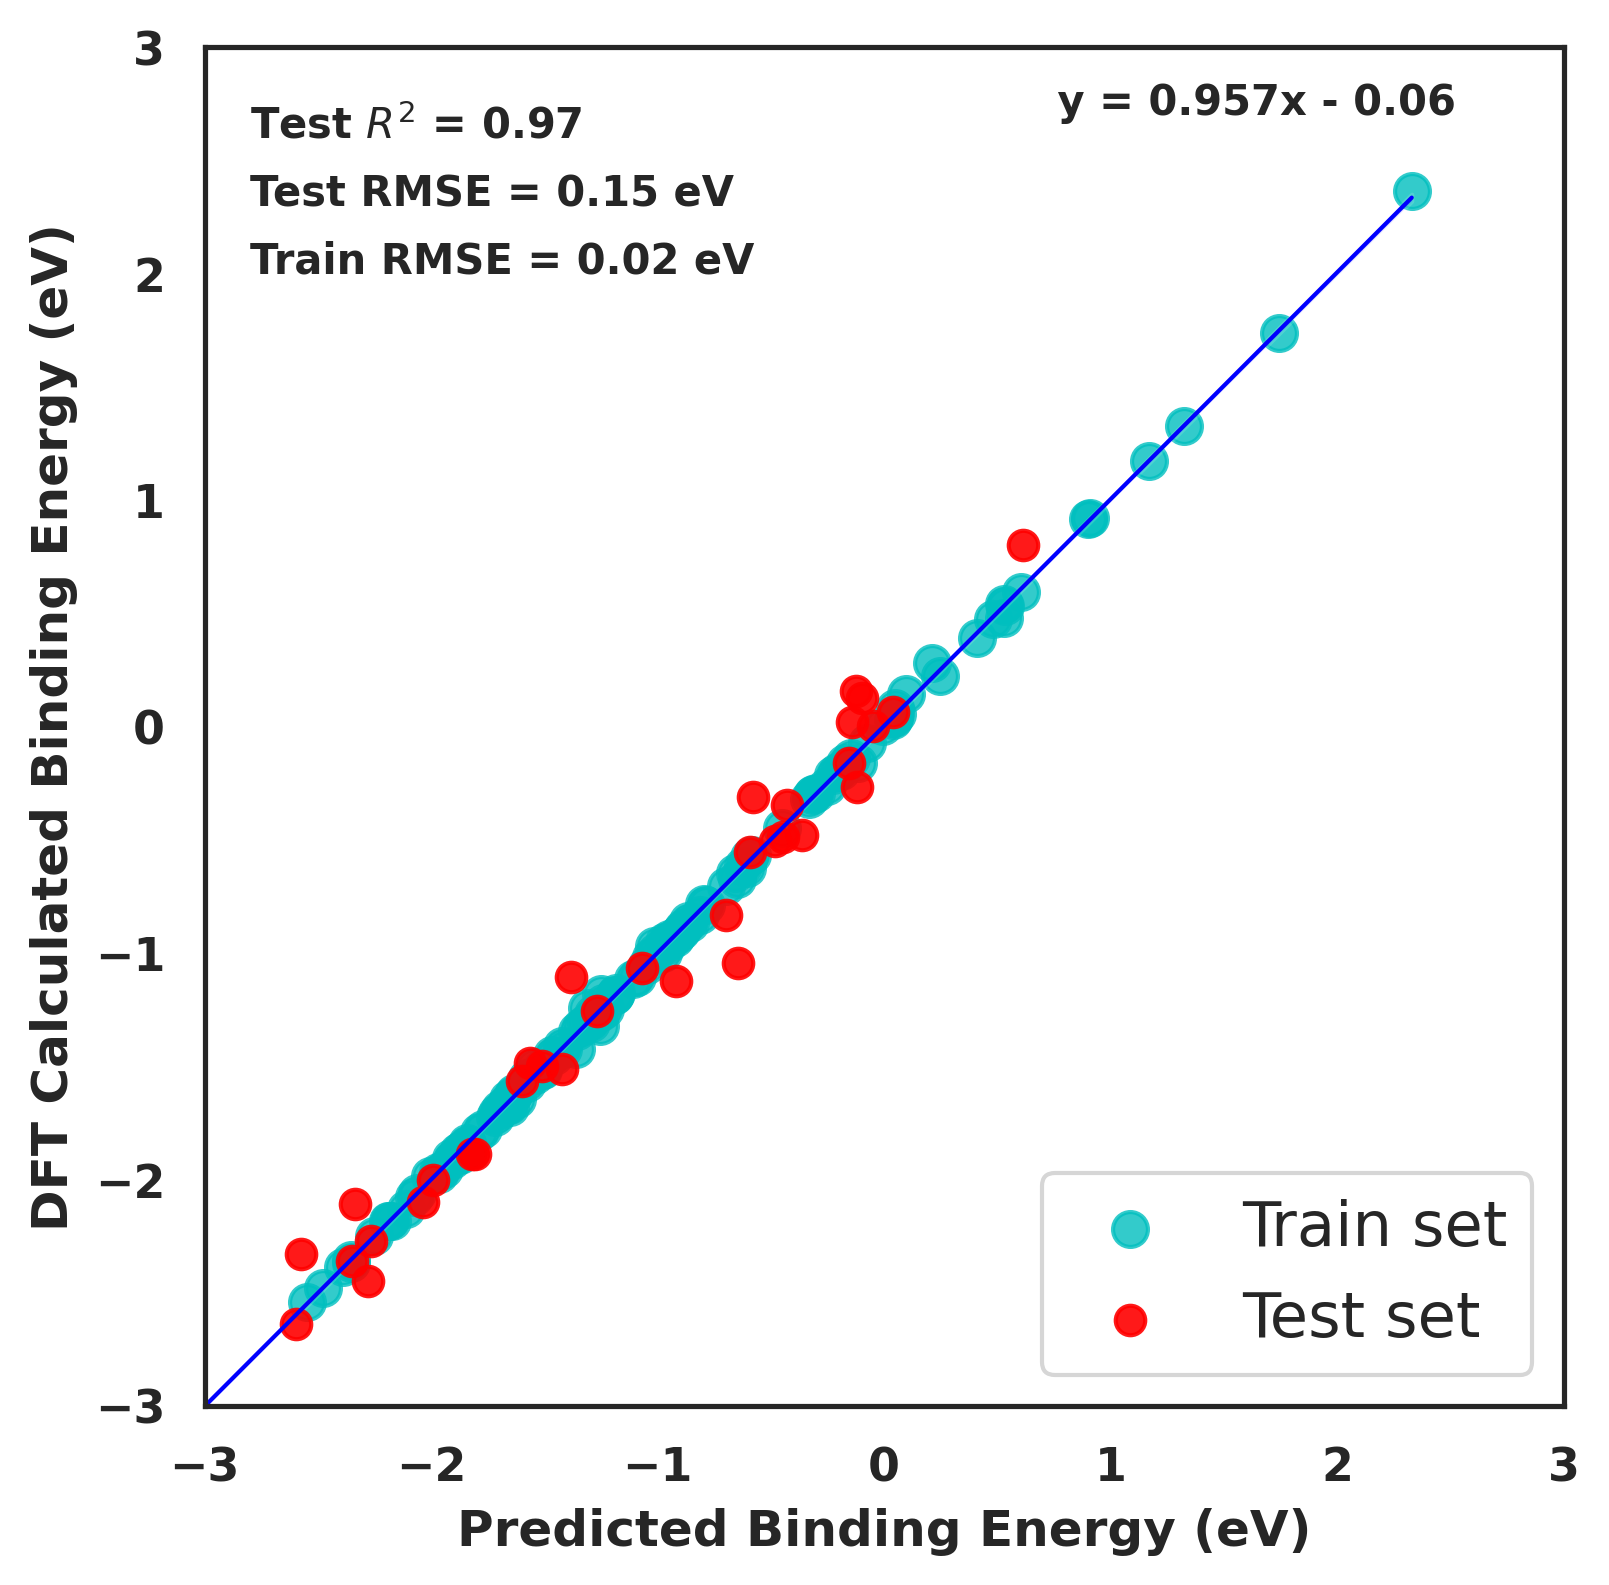

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(6, 6), dpi=300)
plt.rcParams['font.size'] = 10
sns.regplot(x=xgbr_train_pred, y=y_train,color='c',scatter_kws={'s':70},line_kws={"lw":1, 'color':'blue'},label = 'Train set')
plt.scatter(xgbr_test_pred, y_test, color='r',s=50, label = 'Test set', alpha = 0.9)
plt.xlabel('Predicted Binding Energy (eV)', fontsize = 12,weight='bold')
plt.ylabel('DFT Calculated Binding Energy (eV)', fontsize = 12,weight='bold')
plt.axis('square')
plt.text(-2.8, 2.0, "Train RMSE = 0.02 eV",weight='bold')
plt.text(-2.8, 2.3, "Test RMSE = 0.15 eV", weight='bold')
#plt.text(-0.15, 1.2, "Test MAE = 0.031 $E_h$", weight='bold')
#plt.text(-0.2, 1, "Train $R^2$ = 0.999")
plt.text(-2.8, 2.6, "Test $R^2$ = 0.97", weight='bold')
#plt.text(0.45, 1.1, "Train set: y = 1.000x - 1.763E-06 ")
plt.text(0.7, 2.7, " y = 0.957x - 0.06 ", weight='bold')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

sns.set_theme(style="white", palette=None)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.legend(fontsize=15, loc='lower right')
#plt.grid(False)
plt.show()

# Cross Validation

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from math import sqrt

In [ ]:
xgb = XGBRegressor(random_state=42,objective='reg:squarederror')

In [24]:
df=pd.read_excel('all_data.xlsx')
df1 = df.copy()
df1 = df.drop(['Cation','Molar volume (cm3/mol)','Avg. polarizability(Å3)','Molecular weight (g/mol)','Energy (eV)'], axis=1)
x = df1.drop(["BE (eV)"], axis=1)
y = df1["BE (eV)"]

In [ ]:
df1.shape

(169, 13)

In [28]:
xgb = XGBRegressor(base_score=0.1, cv=2, learning_rate=0.15, max_depth=2,
             n_estimators=1800, objective='reg:squarederror', random_state=42,
             verbose=45)

In [25]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
k_folds = KFold(n_splits=5)
scores = cross_val_score(xgb,x,y,cv=k_folds, scoring='neg_mean_squared_error')
rmse = np.sqrt(-scores)
print("RMSE values: ", np.round(rmse, 3))
print("RMSE average: ", np.mean(rmse))
#scores1=[-i for i in scores]
#print(scores1)
#print(np.mean(scores1))

RMSE values:  [0.311 0.271 0.157 0.278 0.95 ]
RMSE average:  0.3934624719049089


using GBR

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr=GradientBoostingRegressor(alpha=0.19, learning_rate=0.15, max_depth=2,
                          min_samples_split=5, n_estimators=2100,
                          random_state=42, verbose=20)

In [ ]:
k_folds = KFold(n_splits=5)
scores = cross_val_score(gbr,x,y,cv=k_folds, scoring='neg_mean_absolute_error')
#rmse = np.sqrt(-scores)
#print("RMSE values: ", np.round(rmse, 3))
#print("RMSE average: ", np.mean(rmse))
scores1=[-i for i in scores]
print(scores1)
print(np.mean(scores1))

Streaming output truncated to the last 5000 lines.
      1305           0.0008            0.83s
      1306           0.0008            0.83s
      1307           0.0008            0.83s
      1308           0.0008            0.83s
      1309           0.0008            0.83s
      1310           0.0008            0.83s
      1311           0.0008            0.82s
      1312           0.0008            0.82s
      1313           0.0008            0.82s
      1314           0.0008            0.82s
      1315           0.0008            0.82s
      1316           0.0008            0.82s
      1317           0.0008            0.82s
      1318           0.0008            0.82s
      1319           0.0008            0.82s
      1320           0.0008            0.81s
      1321           0.0007            0.81s
      1322           0.0007            0.81s
      1323           0.0007            0.81s
      1324           0.0007            0.81s
      1325           0.0007            0.81s
    

## LOOCV_GBR

In [21]:
import numpy as np
from sklearn.model_selection import LeaveOneOut

In [22]:
loo = LeaveOneOut()

In [ ]:
scores = cross_val_score(gbr,x,y,cv=loo, scoring='neg_mean_squared_error')
print(scores)
rmse = np.sqrt(-scores)
print (rmse)
#print("RMSE values: ", np.round(rmse, 3))
print("RMSE average: ", np.mean(rmse))

Streaming output truncated to the last 5000 lines.
      1390           0.0011            0.79s
      1391           0.0011            0.79s
      1392           0.0011            0.79s
      1393           0.0011            0.79s
      1394           0.0011            0.79s
      1395           0.0011            0.78s
      1396           0.0011            0.78s
      1397           0.0011            0.78s
      1398           0.0011            0.78s
      1399           0.0011            0.78s
      1400           0.0011            0.78s
      1401           0.0011            0.78s
      1402           0.0011            0.78s
      1403           0.0011            0.77s
      1404           0.0011            0.77s
      1405           0.0011            0.77s
      1406           0.0011            0.77s
      1407           0.0011            0.77s
      1408           0.0011            0.77s
      1409           0.0011            0.77s
      1410           0.0011            0.77s
    

In [ ]:
LOOCV_RMSE_df=pd.DataFrame()
LOOCV_RMSE_df['rmse']=rmse

In [ ]:
LOOCV_RMSE_df.to_excel('loocv_rmse.xlsx')

## **LOOCV_LGBR**

In [31]:
lgbr=LGBMRegressor(learning_rate=0.06, max_depth=2, min_child_weight=1,
              n_estimators=500, num_leaves=50, random_state=42, verbose=5)

In [32]:
scores = cross_val_score(lgbr,x,y,cv=loo, scoring='neg_mean_squared_error')
print(scores)
rmse = np.sqrt(-scores)
print (rmse)
#print("RMSE values: ", np.round(rmse, 3))
print("RMSE average: ", np.mean(rmse))

Streaming output truncated to the last 5000 lines.
[LightGBM] [Debug] Trained a tree with leaves = 4 and depth = 2
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 3 and depth = 2
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 3 and depth = 2
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 3 and depth = 2
[LightGBM] [Debug] Trained a tree with leaves = 4 and depth = 2
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 3 and depth = 2
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 3 and depth = 2
[LightGBM] [Debug] Trained a tree with leaves = 4 and depth = 2
[LightGBM] [Debug] Trained a tree with leaves = 4 and depth = 

## LOOCV_XGBR

In [30]:
scores = cross_val_score(xgb,x,y,cv=loo, scoring='neg_mean_squared_error')
print(scores)
rmse_xgbr = np.sqrt(-scores)
print (rmse_xgbr)
#print("RMSE values: ", np.round(rmse, 3))
print("RMSE average: ", np.mean(rmse_xgbr))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:49:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "cv", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:50:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "cv", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:50:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "cv", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:50:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "cv", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:50:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "cv", "verbose" } are not us

[-1.88962436e-02 -2.25667091e-01 -5.49906328e-01 -1.61467799e-01
 -2.67621846e-02 -6.24405271e-03 -1.08788729e-02 -6.53111614e-02
 -1.23628487e-01 -9.04054569e-02 -5.06379436e-01 -6.48628955e-02
 -4.16389815e-02 -2.45006286e-02 -6.84440847e-04 -1.80317784e-01
 -1.12674930e-01 -1.01505308e-03 -1.68907613e-02 -3.59327280e-02
 -1.54449096e-01 -6.56738661e-03 -1.48706597e-04 -4.62331792e-02
 -3.13603470e-02 -5.25017822e-02 -5.46314020e-02 -3.27112433e-04
 -2.41141787e-03 -3.73243779e-04 -6.56046743e-03 -6.76567699e-02
 -1.55122487e-03 -6.75132120e-03 -2.63144330e-05 -1.23177514e-02
 -4.49340182e-03 -2.69970341e-02 -4.54752485e-04 -4.95616935e-05
 -5.11528683e-04 -2.19410716e-02 -6.31854946e-02 -7.94377979e-02
 -3.96883079e-04 -1.01654545e-03 -8.06837023e-03 -9.05528445e-03
 -3.54729888e-04 -1.39758884e-04 -3.89783050e-01 -3.54112067e-03
 -1.07783440e-01 -3.44814179e-01 -1.25262191e+00 -3.64228056e-02
 -1.46856226e-02 -1.23210838e-03 -3.04518137e-02 -2.78679372e-02
 -5.26859134e-02 -1.11836

In [ ]:
LOOCV_RMSE_df=pd.DataFrame()
LOOCV_RMSE_df['rmse']=rmse_xgbr

In [ ]:
LOOCV_RMSE_df.to_excel('loocv_xgbr_rmse.xlsx')

## Decission tree

In [ ]:
df=pd.read_excel('all_data.xlsx')
df1 = df.copy()
df1 = df.drop(['Cation','Molar volume (cm3/mol)','Avg. polarizability(Å3)','Molecular weight (g/mol)','Energy (eV)'], axis=1)
x = df1.drop(["BE (eV)"], axis=1)
y = df1["BE (eV)"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=42)
dtr.fit(x_train,y_train)
y_dtr=dtr.predict(x_test)
rmse=sqrt(mean_squared_error(y_test,y_dtr))
print(rmse)
train_pred=dtr.predict(x_train)
train_rmse=sqrt(mean_squared_error(y_train,train_pred))
train_rmse

0.511362827331505


0.0

In [ ]:
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[4,5,6,7,8,9,10,11,12,13],
           "min_weight_fraction_leaf":[0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
DTR=DecisionTreeRegressor(random_state=42)
RMSE = []
RANDOM_STATE = []
for i in range(0, 501, 1):
  RANDOM_STATE.append(i)
  DTR_randomcv = RandomizedSearchCV(estimator=DTR, param_distributions=parameters, random_state=i)
  DTR_randomcv.fit(x_train, y_train)
  DTR_best = DTR_randomcv.best_estimator_
  DTR_best_pred = DTR_best.predict(x_test)
  DTR_best_RMSE = sqrt(mean_squared_error(y_test, DTR_best_pred))
  RMSE.append(DTR_best_RMSE)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 1315, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 304, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
V

In [ ]:
min(RMSE)

0.7142890570751123

In [ ]:
DTR_RMSE_df=pd.DataFrame()
DTR_RMSE_df['rmse']=RMSE
DTR_RMSE_df['random_state']=RANDOM_STATE

In [ ]:
minimum = min(RMSE)
print(minimum)
RS = DTR_RMSE_df[DTR_RMSE_df['rmse']==minimum].iloc[0]["random_state"]
RS

0.7142890570751123


34.0

In [ ]:
DTR=DecisionTreeRegressor(random_state=42)
DTR_randomcv = RandomizedSearchCV(estimator=DTR, param_distributions=parameters, random_state=34)
DTR_randomcv.fit(x_train, y_train)
DTR_best = DTR_randomcv.best_estimator_
print(DTR_best)
DTR_best_pred = DTR_best.predict(x_test)
DTR_best_RMSE = sqrt(mean_squared_error(y_test, DTR_best_pred))
RMSE.append(DTR_best_RMSE)
print(DTR_best_RMSE)

DecisionTreeRegressor(max_depth=3, max_leaf_nodes=30, min_samples_leaf=4,
                      min_weight_fraction_leaf=0.09, random_state=42,
                      splitter='random')
0.7142890570751123


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
DTR=DecisionTreeRegressor(random_state=42)

In [ ]:
DTR = DecisionTreeRegressor(max_depth=3, max_leaf_nodes=30, min_samples_leaf=4,
                      min_weight_fraction_leaf=0.09, random_state=42,
                      splitter='random')
DTR.fit(x_train, y_train)
DTR_test_pred = DTR.predict(x_test)
DTR_train_pred = DTR.predict(x_train)
print("TEST_RMSE:",sqrt(mean_squared_error(y_test, DTR_test_pred)))
print("TEST_MAE:",mean_absolute_error(y_test, DTR_test_pred))
print("TEST_R2:",r2_score(y_test, DTR_test_pred))
print("Train_RMSE:",sqrt(mean_squared_error(y_train, DTR_train_pred)))
print("Train_MAE:",mean_absolute_error(y_train, DTR_train_pred))
print("Train_R2:",r2_score(y_train, DTR_train_pred))

TEST_RMSE: 0.7142890570751123
TEST_MAE: 0.571435023788472
TEST_R2: 0.38455556672683155
Train_RMSE: 0.8735573338983584
Train_MAE: 0.695249324706796
Train_R2: 0.310279571090439


In [ ]:
for i,j in zip(y_train,DTR_train_pred):
  print(i,j)

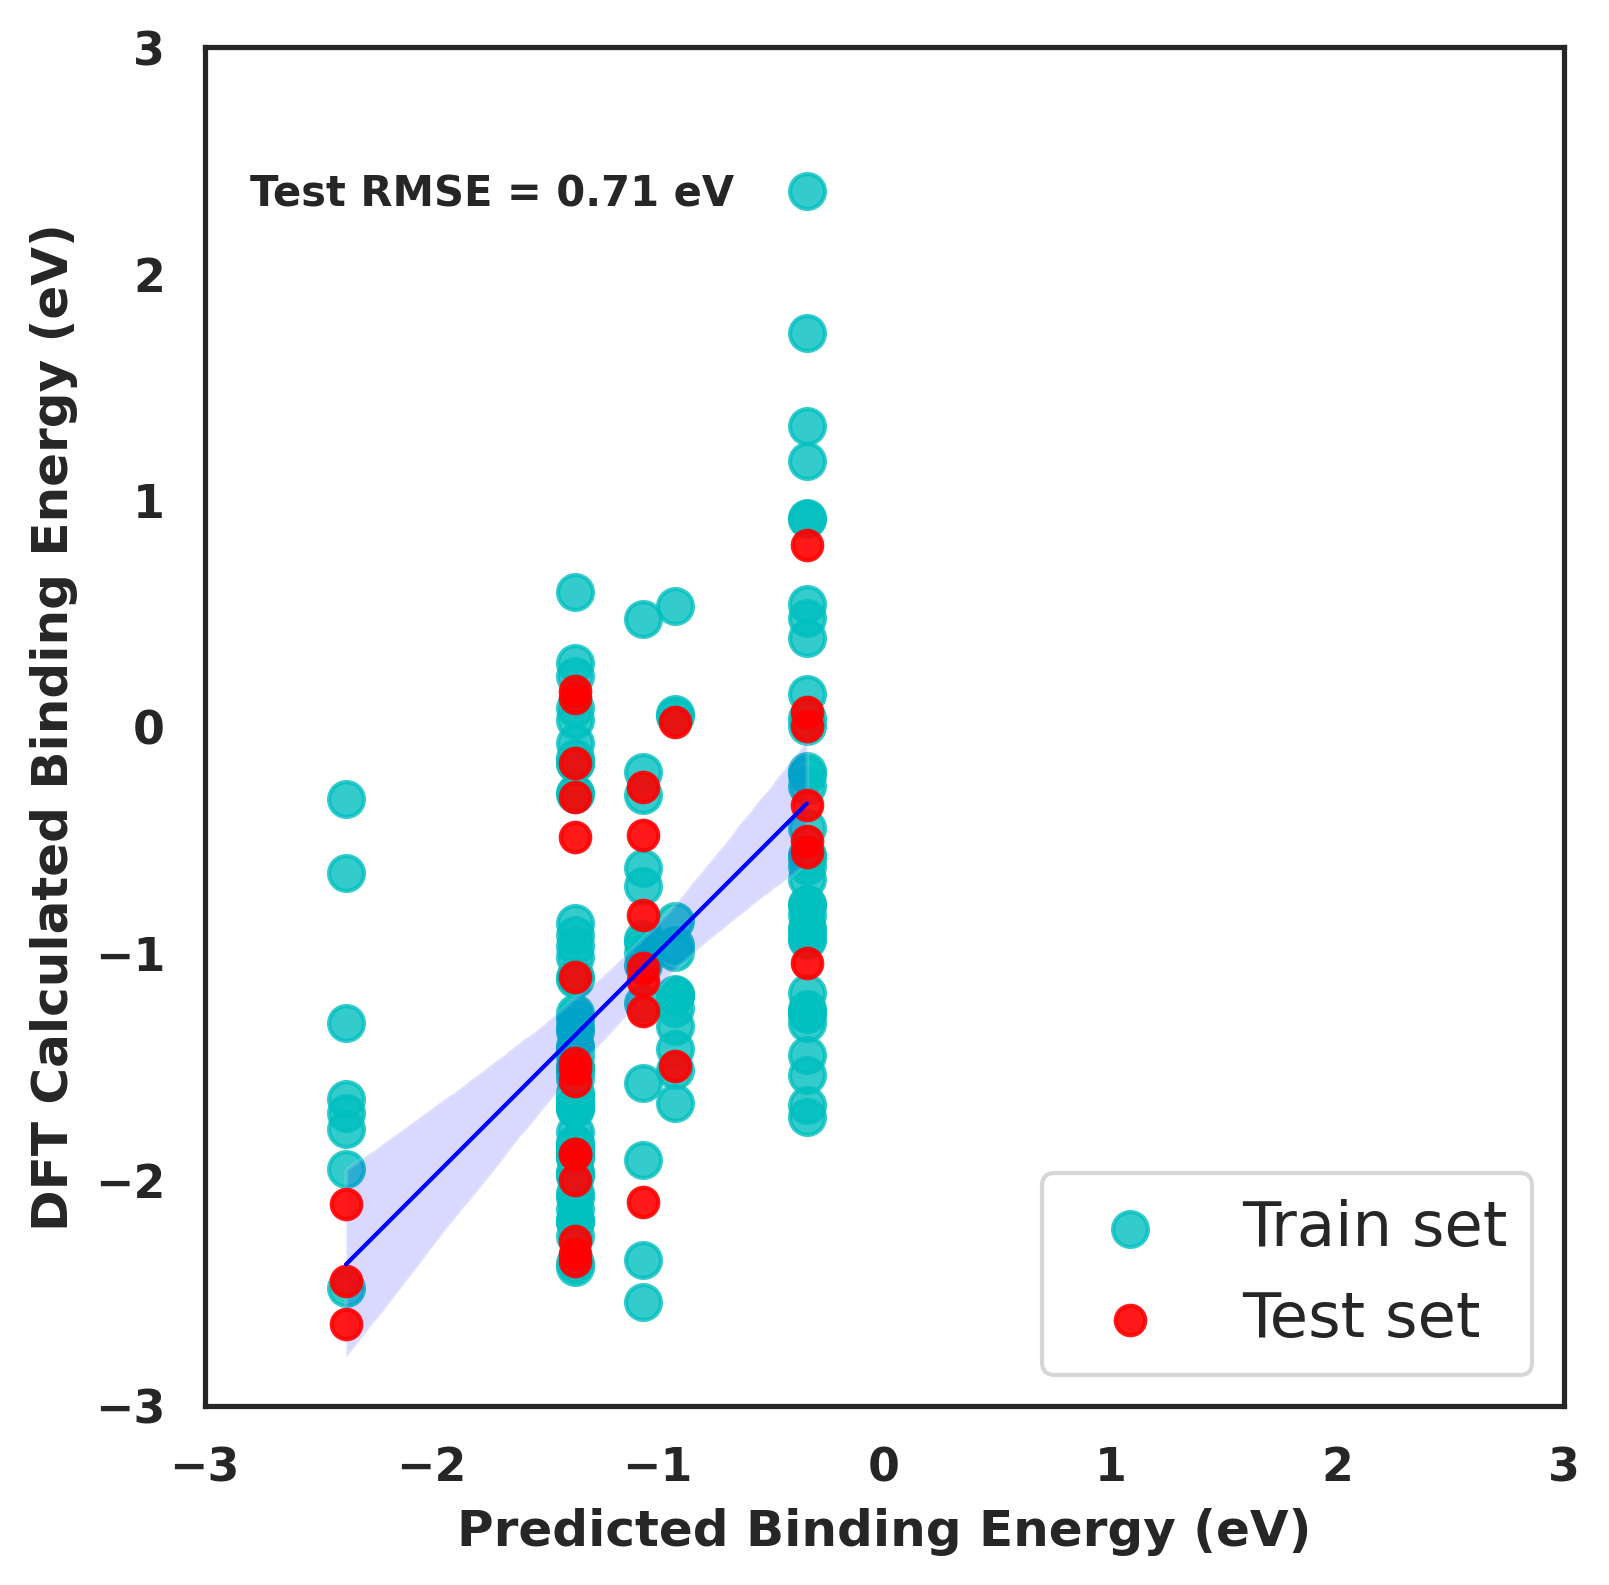

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(6, 6), dpi=300)
plt.rcParams['font.size'] = 10
sns.regplot(x=DTR_train_pred, y=y_train,color='c',scatter_kws={'s':70},line_kws={"lw":1, 'color':'blue'},label = 'Train set')
plt.scatter(DTR_test_pred, y_test, color='r',s=50, label = 'Test set', alpha = 0.9)
plt.xlabel('Predicted Binding Energy (eV)', fontsize = 12,weight='bold')
plt.ylabel('DFT Calculated Binding Energy (eV)', fontsize = 12,weight='bold')
plt.axis('square')
#plt.text(-2.8, 2.0, "Train RMSE = 0.87 eV",weight='bold')
plt.text(-2.8, 2.3, "Test RMSE = 0.71 eV", weight='bold')
#plt.text(-0.15, 1.2, "Test MAE = 0.031 $E_h$", weight='bold')
#plt.text(-0.2, 1, "Train $R^2$ = 0.999")
#plt.text(-2.8, 2.6, "Test $R^2$ = 0.38", weight='bold')
#plt.text(0.45, 1.1, "Train set: y = 1.000x - 1.763E-06 ")
#plt.text(0.7, 2.7, " y = 0.951x - 0.05 ", weight='bold')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

sns.set_theme(style="white", palette=None)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.legend(fontsize=15, loc='lower right')
#plt.grid(False)
plt.show()

# **LOOCV_DTR**

In [37]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=42)
DTR = DecisionTreeRegressor(max_depth=3, max_leaf_nodes=30, min_samples_leaf=4,
                      min_weight_fraction_leaf=0.09, random_state=42,
                      splitter='random')

In [38]:
import numpy as np
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

In [39]:
scores = cross_val_score(DTR,x,y,cv=loo, scoring='neg_mean_squared_error')
print(scores)
rmse = np.sqrt(-scores)
print (rmse)
#print("RMSE values: ", np.round(rmse, 3))
print("RMSE average: ", np.mean(rmse))

[-1.01685302e+00 -1.95959422e-02 -3.03656103e-01 -1.82907592e+00
 -3.83308299e-02 -8.66406427e-04 -1.41848100e+00 -9.13879187e-02
 -1.22310777e-02 -2.36985528e-03 -4.92865045e-01 -5.38011620e-01
 -1.77426261e+00 -5.63477507e-02 -1.56425982e-03 -1.79365850e-02
 -7.56629810e+00 -2.56128016e+00 -7.61167738e-01 -2.83687461e-01
 -7.89432250e-01 -3.60960640e-01 -1.61356531e+00 -6.15518702e-01
 -1.30609960e-01 -5.10534025e-02 -1.68619635e+00 -8.47653688e-02
 -3.00997356e-02 -1.26808242e-01 -4.57858164e-01 -8.42963495e-01
 -1.68319734e-02 -8.95434376e-02 -1.72484444e-02 -3.38502322e-01
 -1.01685302e+00 -3.59844405e-02 -1.34880546e-01 -2.68759597e-01
 -1.01685302e+00 -4.16324184e-01 -2.38984554e-01 -5.30955111e-01
 -1.97446923e-01 -1.36305625e-02 -8.70250000e-06 -1.10524586e-01
 -3.49690000e-04 -4.75450810e-01 -3.35687062e+00 -5.11082908e-02
 -6.61240028e-01 -1.51061658e+00 -1.45661910e-02 -1.57735398e+00
 -1.23221349e-01 -1.54806919e+00 -8.24554803e-01 -8.15487524e-03
 -2.80247009e-02 -1.50432

## **Adaboost**

In [ ]:
df.columns

Index(['Cation', 'BE (eV)', 'Stage', 'No. of cations',
       'Molecular weight (g/mol)', 'Molar volume (cm3/mol)', ' HOMO (eV)',
       ' LUMO (eV)', 'Dipole moment (D)', 'Energy (eV)', 'No. of hetero atoms',
       'Avg. charge on hetero Atom |e|', 'No. of gallery',
       'Avg. ionic radius(Å) ', 'Avg. Pauling electronegativity',
       'Avg. polarizability(Å3)', 'Avg. 1st ionization potential (kJ/mol)',
       'Avg. number of valence electrons'],
      dtype='object')

In [ ]:
df=pd.read_excel('all_data.xlsx')
df1 = df.copy()
df1 = df.drop(['Cation','Molar volume (cm3/mol)','Avg. polarizability(Å3)','Molecular weight (g/mol)','Energy (eV)'], axis=1)
x = df1.drop(["BE (eV)"], axis=1)
y = df1["BE (eV)"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
y_abr=abr.predict(x_test)
rmse=sqrt(mean_squared_error(y_test,y_abr))
print(rmse)
train_pred=abr.predict(x_train)
train_rmse=sqrt(mean_squared_error(y_train,train_pred))
train_rmse

0.6996907482379411


0.5600481423094331

In [ ]:
abr.get_params()

{'base_estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': None}

In [ ]:
param_ADA = {
 'n_estimators': [10,50,100,200,400,600,800,1000,1200,1400,1600],
 'learning_rate' : [0.001,0.01, 0.02, 0.05,0.1,0.3,0.5],
 'loss' : ['linear', 'square', 'exponential']
 }

In [ ]:
ADA=AdaBoostRegressor(random_state=42)
RMSE_ADA = []
RANDOM_STATE_ADA = []
for i in range(0, 50, 1):
  RANDOM_STATE_ADA.append(i)
  ADA_randomcv = RandomizedSearchCV(estimator=ADA, param_distributions=param_ADA, random_state=i)
  ADA_randomcv.fit(x_train, y_train.values.ravel())
  ADA_best = ADA_randomcv.best_estimator_
  ADA_best_pred = ADA_best.predict(x_test)
  ADA_best_RMSE = sqrt(mean_squared_error(y_test.values.ravel(), ADA_best_pred))
  RMSE_ADA.append(ADA_best_RMSE)

In [ ]:
min(RMSE_ADA)

0.6145124349222053

In [ ]:
ADA_RMSE_df=pd.DataFrame()
ADA_RMSE_df['rmse']=RMSE_ADA
ADA_RMSE_df['random_state']=RANDOM_STATE_ADA

In [ ]:
minimum = min(RMSE_ADA)
print(minimum)
RS = ADA_RMSE_df[ADA_RMSE_df['rmse']==minimum].iloc[0]["random_state"]
RS

0.6145124349222053


2.0

In [ ]:
ADA=AdaBoostRegressor(random_state=42)
ADA_randomcv = RandomizedSearchCV(estimator=ADA, param_distributions=param_ADA, random_state=2)
ADA_randomcv.fit(x_train, y_train.values.ravel())
ADA_best = ADA_randomcv.best_estimator_
print(ADA_best)
ADA_best_pred = ADA_best.predict(x_test)
ADA_best_RMSE = sqrt(mean_squared_error(y_test.values.ravel(), ADA_best_pred))
print(ADA_best_RMSE)

AdaBoostRegressor(learning_rate=0.05, loss='exponential', n_estimators=800,
                  random_state=42)
0.6145124349222053


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
ADA = AdaBoostRegressor(learning_rate=0.05, loss='exponential', n_estimators=800,
                  random_state=42)
ADA.fit(x_train, y_train)
ADA_test_pred = ADA.predict(x_test)
ADA_train_pred = ADA.predict(x_train)
print("TEST_RMSE:",sqrt(mean_squared_error(y_test, ADA_test_pred)))
print("TEST_MAE:",mean_absolute_error(y_test, ADA_test_pred))
print("TEST_R2:",r2_score(y_test, ADA_test_pred))
print("Train_RMSE:",sqrt(mean_squared_error(y_train, ADA_train_pred)))
print("Train_MAE:",mean_absolute_error(y_train, ADA_train_pred))
print("Train_R2:",r2_score(y_train, ADA_train_pred))

TEST_RMSE: 0.6145124349222053
TEST_MAE: 0.5412645970524047
TEST_R2: 0.5444855009250466
Train_RMSE: 0.5297281794795542
Train_MAE: 0.4433799060106595
Train_R2: 0.7463724573435655


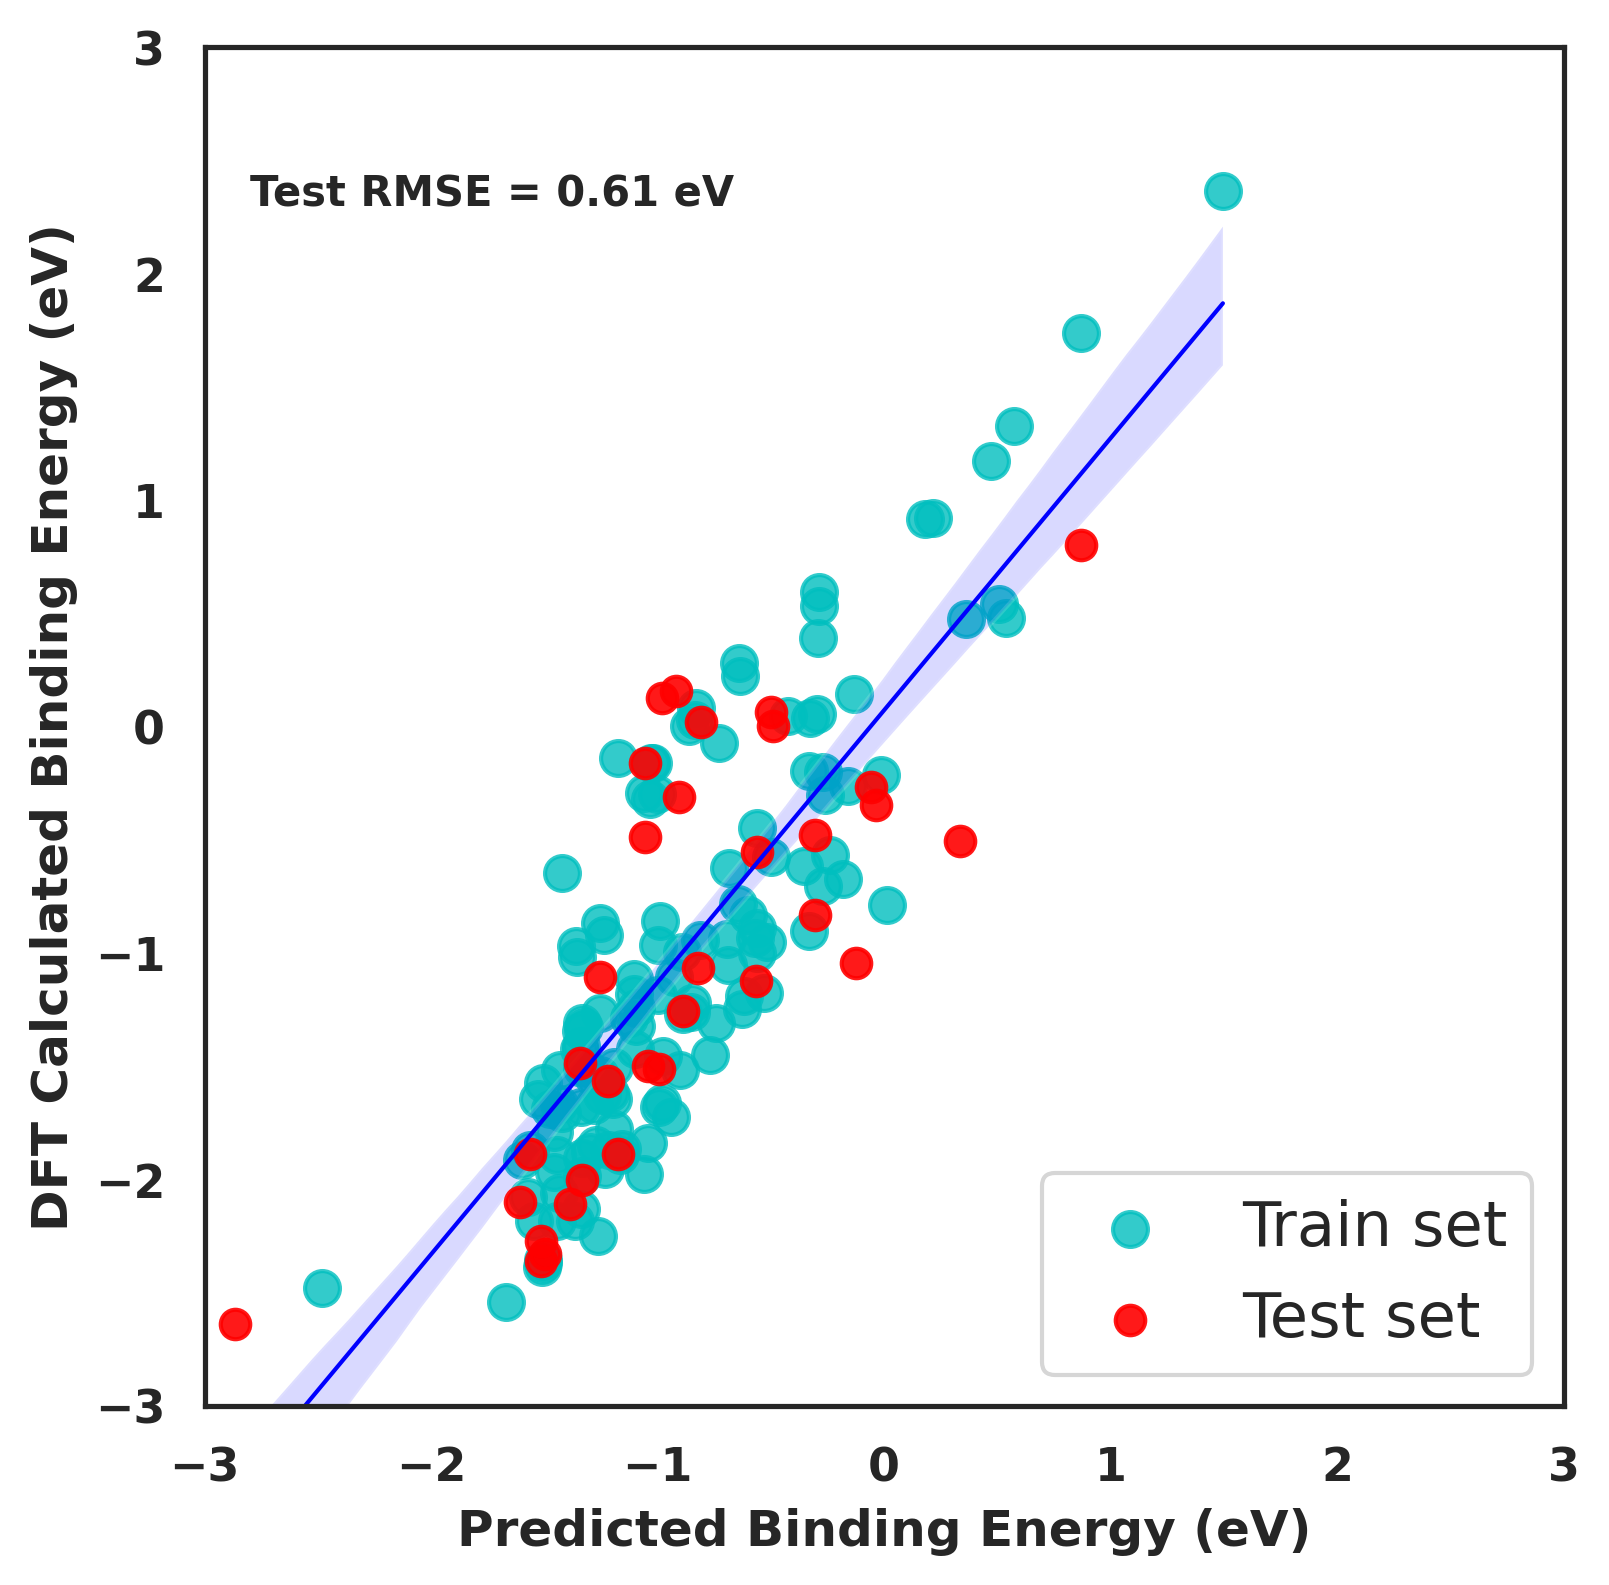

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(6, 6), dpi=300)
plt.rcParams['font.size'] = 10
sns.regplot(x=ADA_train_pred, y=y_train,color='c',scatter_kws={'s':70},line_kws={"lw":1, 'color':'blue'},label = 'Train set')
plt.scatter(ADA_test_pred, y_test, color='r',s=50, label = 'Test set', alpha = 0.9)
plt.xlabel('Predicted Binding Energy (eV)', fontsize = 12,weight='bold')
plt.ylabel('DFT Calculated Binding Energy (eV)', fontsize = 12,weight='bold')
plt.axis('square')
#plt.text(-2.8, 2.0, "Train RMSE = 0.50 eV",weight='bold')
plt.text(-2.8, 2.3, "Test RMSE = 0.61 eV", weight='bold')
#plt.text(-0.15, 1.2, "Test MAE = 0.031 $E_h$", weight='bold')
#plt.text(-0.2, 1, "Train $R^2$ = 0.999")
#plt.text(-2.8, 2.6, "Test $R^2$ = 0.59", weight='bold')
#plt.text(0.45, 1.1, "Train set: y = 1.000x - 1.763E-06 ")
#plt.text(0.7, 2.7, " y = 0.951x - 0.05 ", weight='bold')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

sns.set_theme(style="white", palette=None)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.legend(fontsize=15, loc='lower right')
#plt.grid(False)
plt.show()

## LOOCV_ADA

In [40]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()
ADA = AdaBoostRegressor(learning_rate=0.05, loss='exponential', n_estimators=800,
                  random_state=42)

In [41]:
import numpy as np
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

In [42]:
scores = cross_val_score(ADA,x,y,cv=loo, scoring='neg_mean_squared_error')
print(scores)
rmse = np.sqrt(-scores)
print (rmse)
#print("RMSE values: ", np.round(rmse, 3))
print("RMSE average: ", np.mean(rmse))

[-7.35241708e-01 -1.08241000e-01 -6.05802778e-03 -1.02840542e+00
 -3.51056250e-03 -1.07584000e-01 -5.78258854e-01 -1.28946281e-05
 -2.39488740e-02 -1.84228735e-03 -5.51396802e-01 -5.37524934e-01
 -1.03478573e+00 -7.51404844e-04 -1.29372279e-02 -9.19628256e-02
 -5.17880190e+00 -3.06568264e-02 -5.80967318e-01 -9.65702709e-02
 -3.47023673e-02 -8.64900000e-03 -1.67443600e+00 -1.24626777e-02
 -1.38235240e-01 -2.55881650e-01 -1.08720884e+00 -5.57617899e-02
 -3.71805476e-02 -1.50027111e-01 -2.42369476e-01 -4.47675693e-01
 -3.73593673e-02 -5.99877232e-02 -2.05516568e-02 -1.21981196e-01
 -6.74639779e-01 -1.06378145e-01 -3.25663669e-02 -1.18044301e-01
 -7.81029300e-01 -1.56560620e-01 -3.45171124e-01 -7.13300898e-01
 -1.55795785e-02 -4.37855625e-02 -1.33393515e-01 -1.88916047e-01
 -7.82400816e-02 -1.27238400e+00 -1.23210000e+00 -5.79650512e-01
 -1.00787258e-02 -7.87349023e-02 -8.80969960e-01 -9.89463197e-01
 -1.41654274e-01 -5.96508789e-02 -7.78025220e-02 -5.24001151e-02
 -6.99900840e-02 -1.62509

## **LOOCV_ETR**

In [44]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor(max_depth=10, max_features=11, max_leaf_nodes=30, min_samples_leaf=2, min_samples_split=3, random_state=42)

In [45]:
loo = LeaveOneOut()

In [46]:
scores = cross_val_score(etr,x,y,cv=loo, scoring='neg_mean_squared_error')
print(scores)
rmse = np.sqrt(-scores)
print (rmse)
#print("RMSE values: ", np.round(rmse, 3))
print("RMSE average: ", np.mean(rmse))

[-5.27068177e-03 -2.50371918e-01 -2.06938388e-01 -4.34503347e-01
 -3.56588083e-02 -1.25376381e-02 -1.62201527e-01 -3.05669705e-02
 -1.51179743e-02 -1.23816561e-01 -4.74837569e-01 -1.97656637e-01
 -2.16118728e-01 -8.19898014e-02 -5.77193266e-02 -1.16047450e-03
 -4.17218572e+00 -4.46495655e-01 -5.16263176e-03 -1.53127441e-01
 -2.14711557e-01 -2.68162477e-02 -1.64411816e+00 -7.78815954e-02
 -1.91501404e-02 -1.01661324e-01 -1.50791934e-01 -2.13354263e-01
 -5.60618613e-03 -2.24620042e-02 -3.45220631e-02 -3.82193591e-01
 -1.38240106e-01 -3.64973050e-04 -2.65994178e-03 -1.13430803e-01
 -5.22100640e-03 -1.93170294e-01 -2.61591734e-04 -2.34970805e-02
 -3.07583697e-02 -2.09515297e-02 -1.09053161e-01 -6.94800754e-01
 -7.83221909e-02 -4.18568575e-03 -2.99111008e-02 -4.16569366e-02
 -6.58580350e-02 -7.42355955e-01 -2.56053612e-02 -1.12509000e+00
 -1.39212256e-01 -7.97512978e-01 -4.39783451e-01 -4.54830348e-02
 -2.96014432e-02 -1.10999032e-02 -3.31875102e-04 -1.91481801e-03
 -2.92478694e-03 -1.10898

## **LOOCV_RFR**

In [48]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(max_depth=60,min_samples_split=4,n_estimators=10,random_state=42)

In [49]:
loo = LeaveOneOut()


In [50]:
scores = cross_val_score(rfr,x,y,cv=loo, scoring='neg_mean_squared_error')
print(scores)
rmse = np.sqrt(-scores)
print (rmse)
#print("RMSE values: ", np.round(rmse, 3))
print("RMSE average: ", np.mean(rmse))

[-5.63271111e-02 -5.47461523e-01 -2.54200507e-02 -3.85848028e-01
 -1.14244000e-05 -6.04651707e-02 -1.15233068e-02 -2.87891524e-01
 -1.42779170e-02 -2.68419072e-02 -9.42449404e-01 -4.22508667e-01
 -2.30646466e-01 -3.95329271e-02 -4.33923617e-02 -4.75236249e-03
 -3.76704752e+00 -8.31860964e-02 -5.47419609e-02 -1.84360982e-01
 -1.35605257e-01 -6.32511721e-02 -8.13604000e-01 -1.34520495e-01
 -5.64862367e-02 -3.05078622e-02 -1.44227061e-01 -1.88729011e-01
 -3.89531312e-02 -3.23464507e-02 -8.00081633e-04 -2.48555426e-01
 -7.86709003e-02 -6.64047496e-02 -2.64284630e-02 -1.12903360e-01
 -1.35497610e-03 -9.91830044e-04 -2.74279147e-03 -5.74145495e-02
 -4.06659164e-01 -2.80693724e-02 -2.28564003e-02 -1.71780342e-02
 -3.10437971e-02 -4.76145131e-02 -9.57763230e-02 -1.36870402e-01
 -8.76444806e-01 -7.28120890e-01 -4.09045521e-01 -4.22500000e-05
 -2.92241874e-02 -4.38335214e-01 -1.19820389e+00 -4.16806251e-02
 -6.45767324e-02 -9.10171434e-04 -5.16697400e-03 -3.78181073e-03
 -2.98126400e-03 -3.32160

### LR

In [ ]:
df=pd.read_excel('all_data.xlsx')
df1 = df.copy()
df1 = df.drop(['Cation','Molecular weight (g/mol)','Energy (eV)','Molar volume (cm3/mol)','Avg. polarizability(Å3)'], axis=1)
x = df1.drop(["BE (eV)"], axis=1)
y = df1["BE (eV)"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
lr=LinearRegression()
lr.fit(x_train,y_train)
y_lr=lr.predict(x_test)
sqrt(mean_squared_error(y_test,y_lr))

0.5182101600014618

In [ ]:
lr.get_params()

In [ ]:
copy_X_1 = ['True', 'False']
fit_intercept_1 = ['True', 'False']
n_jobs_1 = [1,10,20,30,40,50,60,70,80,90,100]
positive_1= ['True', 'False']

In [ ]:
random_grid = {'copy_X':copy_X_1,
               'fit_intercept':fit_intercept_1,
               'n_jobs':n_jobs_1,
               'positive':positive_1}

In [ ]:
lr_RMSE = []
lr_RANDOM_STATE = []
for i in range(1, 501, 1):
  lr_RANDOM_STATE.append(i)
  lr_randomcv = RandomizedSearchCV(estimator=lr, param_distributions=random_grid, random_state=i)
  lr_randomcv.fit(x_train, y_train)
  best_lr_randomgrid = lr_randomcv.best_estimator_
  lr_pred_best = best_lr_randomgrid.predict(x_test)
  lr_best_rmse=sqrt(mean_squared_error(y_test, lr_pred_best))
  lr_RMSE.append(lr_best_rmse)

In [ ]:
min(lr_RMSE)

0.8880203782443697

In [ ]:
lr_RMSE = pd.DataFrame()
lr_RMSE["Random_state"] = lr_RANDOM_STATE
lr_RMSE["RMSE"] = lr_RMSE

minimum = lr_RMSE.RMSE.min()
RS = lr_RMSE[lr_RMSE['RMSE']==minimum].iloc[0]["Random_state"]
RS

1

In [ ]:
lr_randomcv = RandomizedSearchCV(estimator=lr, param_distributions=random_grid, random_state=1)
lr_randomcv.fit(x_train, y_train)
best_lr_randomgrid = lr_randomcv.best_estimator_
print(best_lr_randomgrid)
lr_pred_best = best_lr_randomgrid.predict(x_test)
lr_best_rmse=sqrt(mean_squared_error(y_test, lr_pred_best))
print(lr_best_rmse)

LinearRegression(copy_X='False', fit_intercept='True', n_jobs=80,
                 positive='True')
0.9163698023114971


## Mutual **Information**

In [51]:
df=pd.read_excel('all_data.xlsx')
df1 = df.copy()
df1 = df.drop(['Cation','Molecular weight (g/mol)','Energy (eV)','Molar volume (cm3/mol)','Avg. polarizability(Å3)'], axis=1)
m = df1.drop(["BE (eV)"], axis=1)
n = df1["BE (eV)"]

In [55]:
n

0     -0.163
1     -1.019
2     -1.575
3     -2.357
4     -0.964
       ...  
164   -1.311
165   -2.640
166   -3.900
167   -1.954
168   -2.110
Name: BE (eV), Length: 169, dtype: float64

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6')])

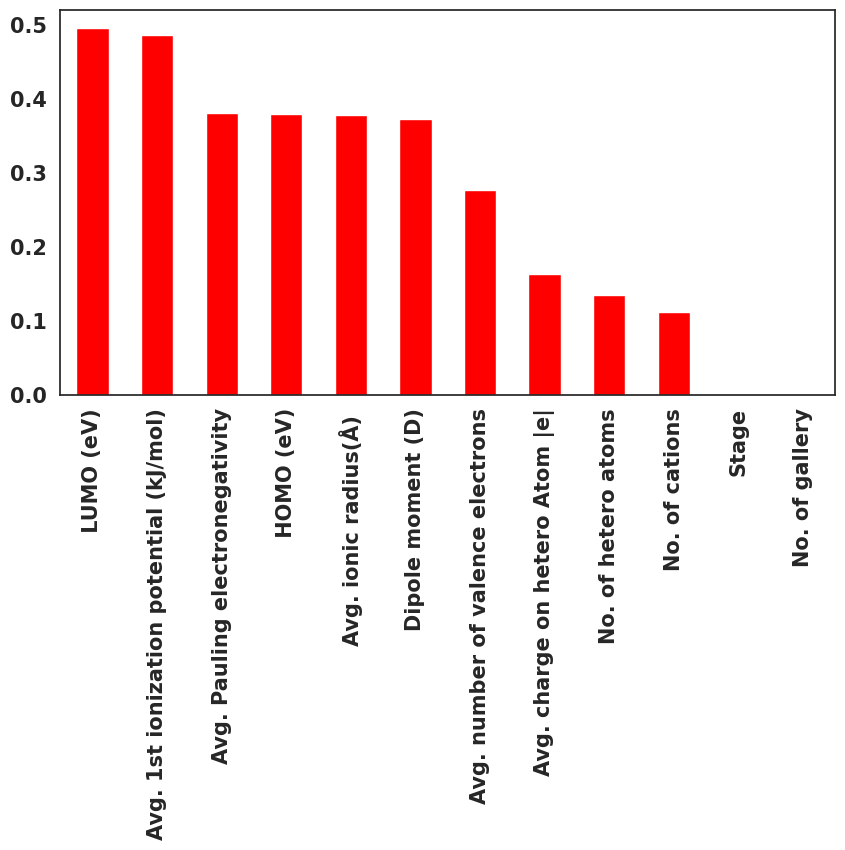

In [58]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(m,n)
mutual_info
mutual_info = pd.Series(mutual_info)
mutual_info.index = m.columns
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(10,5), color ='red')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

## **PSI**

In [66]:
xgbr=XGBRegressor(base_score=0.1, cv=2, learning_rate=0.15, max_depth=2,
             n_estimators=1800, objective='reg:squarederror', random_state=42,
             verbose=45)
xgbr.fit(x_train, y_train)
xgbr_pred = xgbr.predict(x_test)
xgbr_RMSE = sqrt(mean_squared_error(y_test, xgbr_pred))
print(xgbr_RMSE)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:39:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "cv", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


0.14917159621579243


In [89]:
y_test_arr=np.array(y_test)
y_test_arr

array([-1.109e+00,  1.230e-01, -2.640e+00,  8.000e-01, -2.360e+00,
        2.000e-03, -2.005e+00, -1.500e+00, -2.690e-01, -1.630e-01,
       -3.130e-01, -4.900e-01, -1.047e+00,  6.400e-02, -1.255e+00,
       -2.102e+00, -3.480e-01, -2.329e+00, -1.515e+00, -1.125e+00,
       -1.486e+00, -5.560e-01, -8.350e-01,  1.560e-01, -5.060e-01,
       -2.450e+00,  1.700e-02, -1.887e+00, -4.780e-01, -1.567e+00,
       -2.110e+00, -1.068e+00, -2.271e+00, -1.890e+00])

In [85]:
xgbr_pred

array([-2.5604804 , -2.555945  , -2.3497665 , -2.337276  , -2.2768989 ,
       -2.2635603 , -2.0342934 , -1.9899658 , -1.8651202 , -1.8047991 ,
       -1.6003858 , -1.561676  , -1.4216619 , -1.3838909 , -1.3514426 ,
       -1.2682228 , -1.0701572 , -0.9182813 , -0.7712158 , -0.675966  ,
       -0.5910882 , -0.58062744, -0.48394367, -0.45592692, -0.44537473,
       -0.43567106, -0.15576783, -0.15215397, -0.14664744, -0.14190196,
       -0.09971736, -0.05095978,  0.03941069,  0.6139608 ], dtype=float32)

In [117]:
def psi(score_initial, score_new, num_bins = 10, mode = 'fixed'):

    eps = 1e-4

    # Sort the data
    score_initial.sort()
    score_new.sort()

    # Prepare the bins
    min_val = min(min(score_initial), min(score_new))
    max_val = max(max(score_initial), max(score_new))
    if mode == 'fixed':
        bins = [min_val + (max_val - min_val)*(i)/num_bins for i in range(num_bins+1)]
    elif mode == 'quantile':
        bins = pd.qcut(score_initial, q = num_bins, retbins = True)[1] # Create the quantiles based on the initial population
    else:
        raise ValueError(f"Mode \'{mode}\' not recognized. Your options are \'fixed\' and \'quantile\'")
    bins[0] = min_val - eps # Correct the lower boundary
    bins[-1] = max_val + eps # Correct the higher boundary


    # Bucketize the initial population and count the sample inside each bucket
    bins_initial = pd.cut(score_initial, bins = bins, labels = range(1,num_bins+1))
    df_initial = pd.DataFrame({'initial': score_initial, 'bin': bins_initial})
    grp_initial = df_initial.groupby('bin').count()
    grp_initial['percent_initial'] = grp_initial['initial'] / sum(grp_initial['initial'])

    # Bucketize the new population and count the sample inside each bucket
    bins_new = pd.cut(score_new, bins = bins, labels = range(1,num_bins+1))
    df_new = pd.DataFrame({'new': score_new, 'bin': bins_new})
    grp_new = df_new.groupby('bin').count()
    grp_new['percent_new'] = grp_new['new'] / sum(grp_new['new'])

    # Compare the bins to calculate PSI
    psi_df = grp_initial.join(grp_new, on = "bin", how = "inner")

    # Add a small value for when the percent is zero
    psi_df['percent_initial'] = psi_df['percent_initial'].apply(lambda x: eps if x == 0 else x)
    psi_df['percent_new'] = psi_df['percent_new'].apply(lambda x: eps if x == 0 else x)

    # Calculate the psi
    psi_df['psi'] = (psi_df['percent_initial'] - psi_df['percent_new']) * np.log(psi_df['percent_initial'] / psi_df['percent_new'])

    # Return the psi values
    return psi_df['psi'].values

In [128]:
psi_values_fixed = psi(y_test_arr, xgbr_pred, num_bins = 10, mode = 'fixed')

In [121]:
psi_values_fixed

array([0.        , 0.        , 0.        , 0.02385089, 0.18934564,
       0.18934564, 0.04937786, 0.04937786, 0.37448741, 0.        ])

In [122]:
np.mean(psi_values_fixed)

0.08757852960954904

In [137]:
bins = [i for i in range(1,9)]
bins

[1, 2, 3, 4, 5, 6, 7, 8]

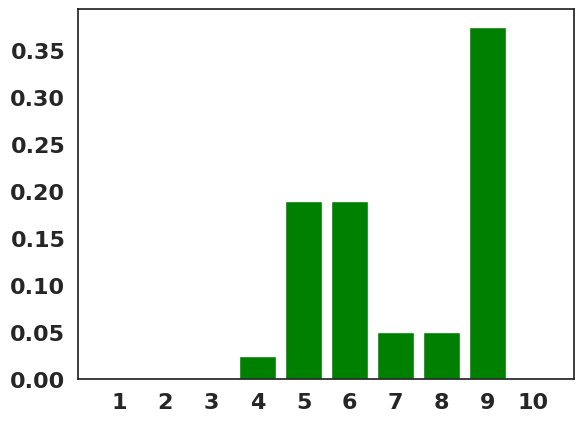

In [125]:
import matplotlib.pyplot as plt
plt.bar(bins,psi_values_fixed,color='green',width=0.8)
plt.xticks(range(1,11),weight='bold', fontsize = 16)
plt.yticks(weight='bold', fontsize = 16)
plt.show()

In [133]:
psi_values_quantile = psi(y_test_arr, xgbr_pred, num_bins = 8, mode = 'quantile')

In [134]:
psi_values_quantile

array([0.0053624 , 0.04077336, 0.        , 0.        , 0.02385089,
       0.        , 0.02385089, 0.08084918])

In [135]:
np.mean(psi_values_quantile)

0.021835840242532975

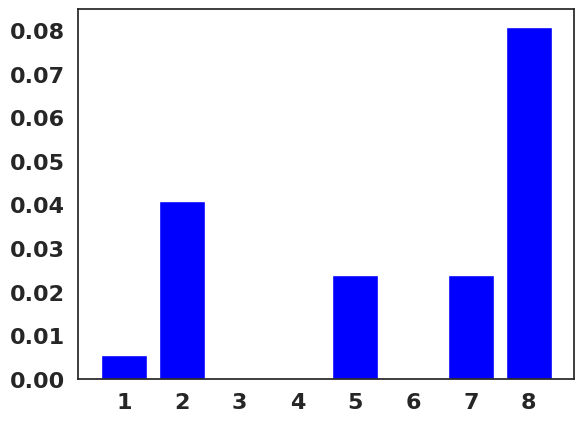

In [138]:
import matplotlib.pyplot as plt
plt.bar(bins,psi_values_quantile,color='blue',width=0.8)
plt.xticks(range(1,9),weight='bold', fontsize = 16)
plt.yticks(weight='bold', fontsize = 16)
plt.show()